In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from labels import class_labels

In [3]:
test_dataset = tf.data.Dataset.load('test_dataset')
test_dataset = test_dataset.shuffle(1000)

2025-02-13 10:37:26.566785: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
extrc_models = []
opt_models   = []
seed_models  = []

# models of diffn extractors
for model_file in os.listdir('models/diff_extrcs/'):
    if model_file.endswith('.h5'):
        model_path  = os.path.join('models/diff_extrcs/', model_file)
        extrc_model = tf.keras.models.load_model(model_path)
        extrc_models.append(extrc_model)

# models of diffn optimizers
for model_file in os.listdir('models/diff_optimizers/'):
    if model_file.endswith('.h5'):
        model_path  = os.path.join('models/diff_optimizers/', model_file)
        extrc_model = tf.keras.models.load_model(model_path)
        opt_models.append(extrc_model)

# models of diffn seeds
for model_file in os.listdir('models/diff_seeds/'):
    if model_file.endswith('.h5'):
        model_path  = os.path.join('models/diff_seeds/', model_file)
        extrc_model = tf.keras.models.load_model(model_path)
        seed_models.append(extrc_model)

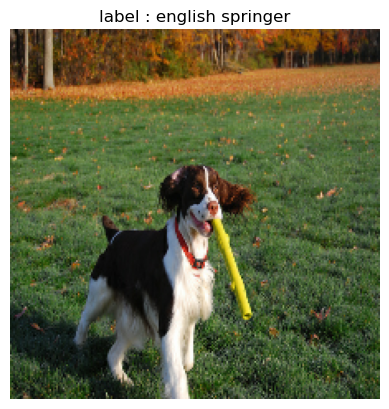

In [43]:
for img_batch, label_batch in test_dataset.take(1):
    img      = np.array(img_batch)
    lbl      = np.array(label_batch)
    test_img = img[3]
    plt.imshow(test_img)
    plt.title(f'label : {class_labels[np.argmax(lbl[3])]}')
    plt.axis('off')

In [75]:
import gc
tf.keras.backend.clear_session()
gc.collect()

149955

In [44]:
for model in extrc_models:
    pred        = model.predict(test_img.reshape(-1,224,224,3), verbose=False)
    pred_index  = np.argmax(pred)
    probability = pred[0][pred_index]
    print(f'{model.name}: {class_labels[np.argmax(pred)]}, Probability: {probability:.4f}')

for model in opt_models:
    pred        = model.predict(test_img.reshape(-1,224,224,3), verbose=False)
    pred_index  = np.argmax(pred)
    probability = pred[0][pred_index]
    print(f'{model.name}: {class_labels[np.argmax(pred)]}, Probability: {probability:.4f}')

Xception_imgnette: english springer, Probability: 1.0000
InceptionV3_imgnette: english springer, Probability: 1.0000
DenseNet121_imgnette: english springer, Probability: 1.0000
Res50_imgnette: english springer, Probability: 1.0000
DenseNet121_rmsp: english springer, Probability: 1.0000
DenseNet121_adam: english springer, Probability: 1.0000
DenseNet121_SGD: english springer, Probability: 1.0000
DenseNet121_nadam: english springer, Probability: 1.0000


In [45]:
for model in seed_models:
    pred        = model.predict(test_img.reshape(-1,224,224,3), verbose=False)
    pred_index  = np.argmax(pred)
    probability = pred[0][pred_index]
    print(f'{model.name}: {class_labels[pred_index]}, Probability: {probability:.4f}')

model_1: english springer, Probability: 1.0000
model_4: english springer, Probability: 1.0000
model: english springer, Probability: 1.0000
model_3: english springer, Probability: 1.0000
model_5: english springer, Probability: 1.0000
model_4: english springer, Probability: 1.0000
model_3: english springer, Probability: 1.0000
model_2: english springer, Probability: 1.0000
model_5: english springer, Probability: 1.0000
model_6: english springer, Probability: 1.0000


In [76]:
import tools
import importlib
importlib.reload(tools)
from tools import LIMEExplainer

lime_explainer = LIMEExplainer()

## different feature extractors

In [77]:
import time
start = time.time()

extrc_lime = []
for model in extrc_models:
    expl  = lime_explainer.explain_aninstance(test_img, model, 1000)
    extrc_lime.append(expl)

end = time.time()
 
# end time in secs
print("Execution time:",
      (end-start), "s")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Execution time: 53.34535455703735 s


## different optimizers

In [79]:
start = time.time()

opt_lime   = []
for model in opt_models:
    expl = lime_explainer.explain_aninstance(test_img, model, 1000)
    opt_lime.append(expl)
end   = time.time()
print("Execution time:",
      (end-start), "s")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Execution time: 65.37871265411377 s


## different weight initialization

In [80]:
start = time.time()

seed_lime  = []
for model in seed_models:
    expl = lime_explainer.explain_aninstance(test_img, model, 1000)
    seed_lime.append(expl)
end   = time.time()
print("Execution time:",
      (end-start), "s")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Execution time: 161.12755060195923 s


In [24]:
# calculate cosine distance between explanations
def cosine_distance_lime(expl1, expl2):
    _, mask1, _ = expl1
    _, mask2, _ = expl2
    
    mask1 = mask1.flatten()
    mask2 = mask2.flatten()

    dot_product = np.dot(mask1, mask2)
    magnitude1  = np.linalg.norm(mask1)
    magnitude2  = np.linalg.norm(mask2)

    similarity  = dot_product / (magnitude1 * magnitude2)
    cosine_dis  = 1 - similarity

    return cosine_dis

# calculate iou distance
def iou_distance_lime(expl1, expl2):
    _, mask1, _  = expl1
    _, mask2, _  = expl2
    mask1        = mask1.flatten()
    mask2        = mask2.flatten()
    
    intersection = np.logical_and(mask1, mask2).sum()
    union        = np.logical_or(mask1, mask2).sum()

    if union == 0:
        return 1.0  # If union is zero, masks are completely disjoint

    iou          = intersection / union
    iou_distance = 1 - iou

    return iou_distance

In [25]:
def pairwise_codistance_lime(explanations, model_names):
    distances = []
    pairs     = []
    for i in range(len(explanations)):
        for j in range(i + 1, len(explanations)):
            pair = f"${model_names[i]}$ vs ${model_names[j]}$"
            pairs.append(pair)
            dist = cosine_distance_lime(explanations[i], explanations[j])
            distances.append(dist)
    return distances, pairs

def pairwise_ioudistance_lime(explanations, model_names):
    distances = []
    pairs     = []
    for i in range(len(explanations)):
        for j in range(i + 1, len(explanations)):
            pair = f"${model_names[i]}$ vs ${model_names[j]}$"
            pairs.append(pair)
            dist = iou_distance_lime(explanations[i], explanations[j])
            distances.append(dist)
    return distances, pairs

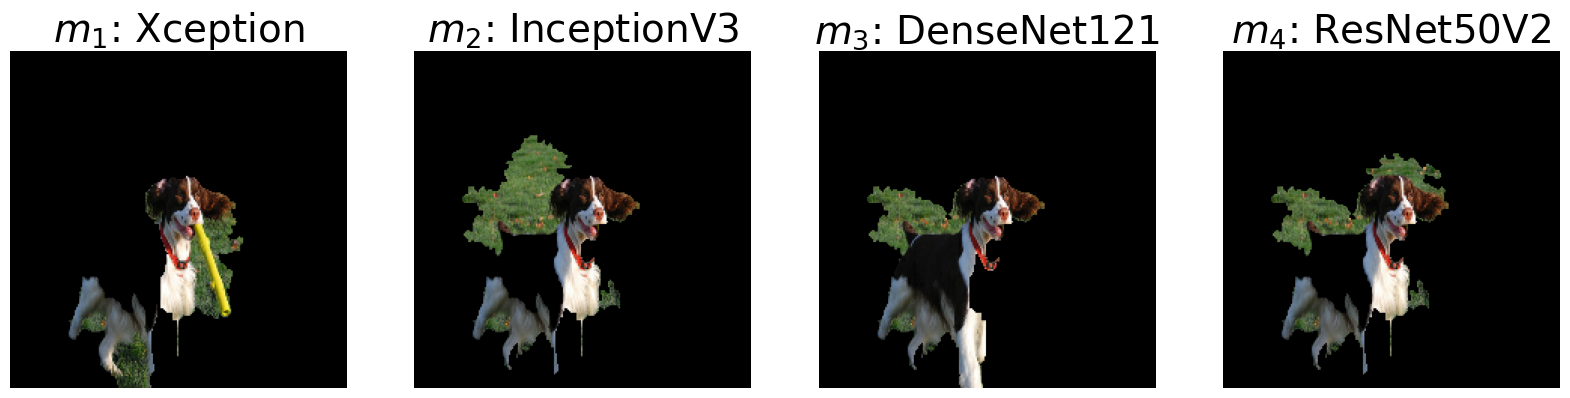

In [81]:
plt.figure(figsize=(20,10))

extrcs_name = ["$m_1$: Xception", "$m_2$: InceptionV3", "$m_3$: DenseNet121", "$m_4$: ResNet50V2"]
for i, ((temp, mask, _), model_name) in enumerate(zip(extrc_lime, extrcs_name)):
    plt.subplot(1,4,i+1)
    plt.imshow(temp)
    plt.title(f'{model_name}', fontsize=28)
    plt.axis('off')

In [27]:
for model in opt_models:
    print(model.name)

DenseNet121_rmsp
DenseNet121_adam
DenseNet121_SGD
DenseNet121_nadam


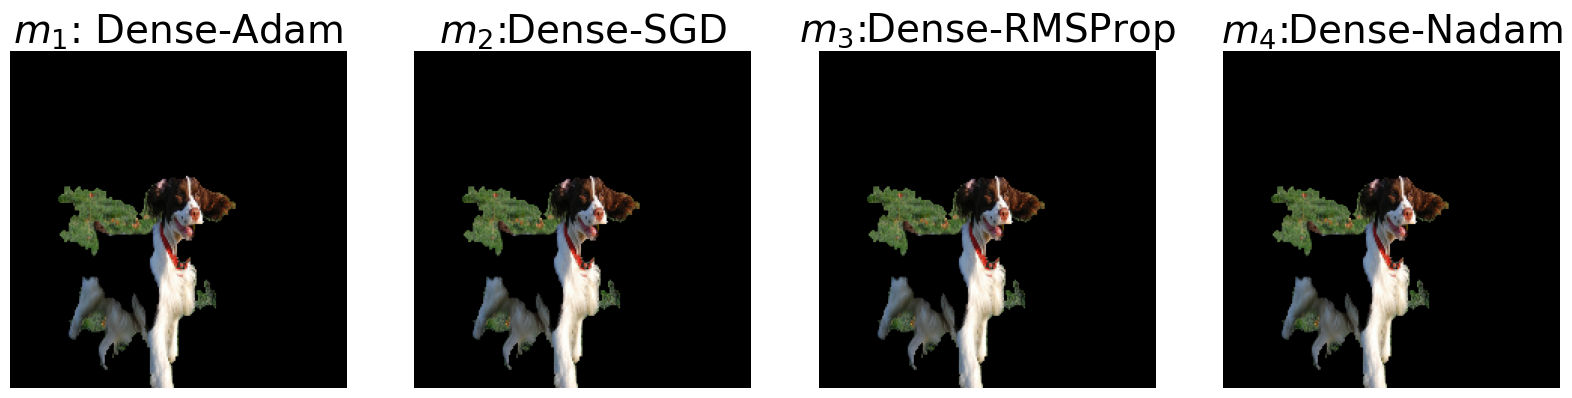

In [82]:
plt.figure(figsize=(20,10))

opts_name = ["$m_1$: Dense-Adam", "$m_2$:Dense-SGD", "$m_3$:Dense-RMSProp", "$m_4$:Dense-Nadam"]
for i, ((temp, mask, _), model_name) in enumerate(zip(opt_lime, opts_name)):
    plt.subplot(1,4,i+1)
    plt.imshow(temp)
    plt.title(f'{model_name}',fontsize=28)
    plt.axis('off')

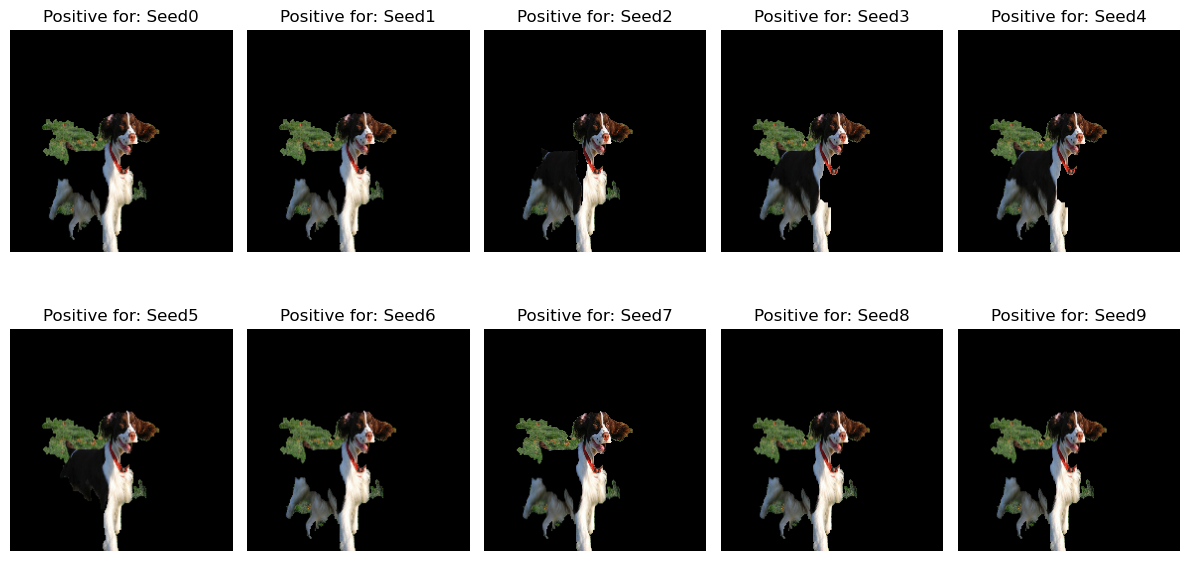

In [83]:
plt.figure(figsize=(12,8))

seed_name = np.arange(10)
for i, ((temp, mask, _), model_name) in enumerate(zip(seed_lime, seed_name)):
    plt.subplot(2,5,i+1)
    plt.imshow(temp)
    plt.title(f'Positive for: Seed{model_name}')
    plt.axis('off')
    plt.tight_layout()

In [30]:
import random

selected_indices = (random.sample([i for i in range(10)], 4))
print(sorted(selected_indices))

[0, 3, 6, 7]


In [84]:
selected_indices = sorted(selected_indices)
selected_expls   = [seed_lime[i] for i in selected_indices]
selected_names   = ['$m_1$: Seed1','$m_2$: Seed3', '$m_3$: Seed6', '$m_4$: Seed7']

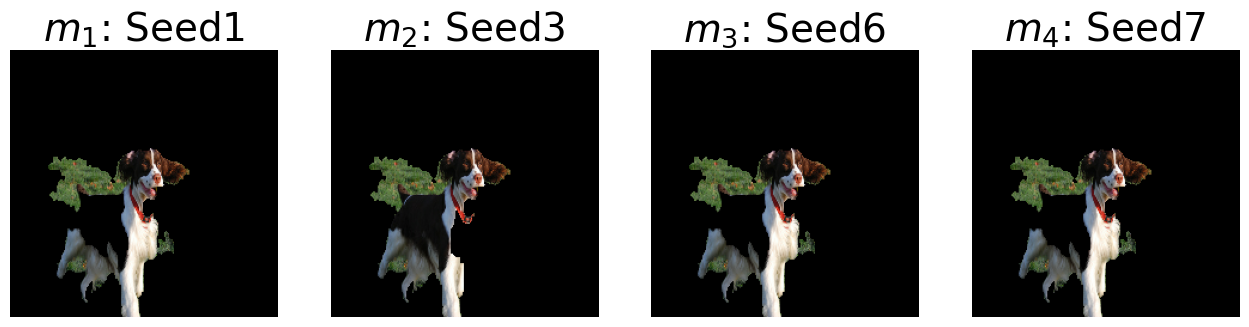

In [85]:
plt.figure(figsize=(20, 10))
for i, ((temp, mask, _), model_name) in enumerate(zip(selected_expls, selected_names)):
    plt.subplot(1, 5, i + 1)  # Update to match the number of selected explanations
    plt.imshow(temp)
    plt.title(f'{model_name}', fontsize=28)
    plt.axis('off')

In [56]:
names = ["m_1", "m_2", "m_3", "m_4"]

In [86]:
# Generate pairwise distances and pairs for each explanation
extrcs_codis_lime, extrcs_copair_lime = pairwise_codistance_lime(extrc_lime, names)
opts_codis_lime, opts_copair_lime     = pairwise_codistance_lime(opt_lime, names)
seeds_codis_lime, seeds_copair_lime   = pairwise_codistance_lime(selected_expls, selected_names)

In [87]:
# Generate pairwise distances and pairs for each explanation
extrcs_ioudis_lime, extrcs_ioupair_lime = pairwise_ioudistance_lime(extrc_lime, names)
opts_ioudis_lime, opts_ioupair_lime     = pairwise_ioudistance_lime(opt_lime, names)
seeds_ioudis_lime, seeds_ioupair_lime   = pairwise_ioudistance_lime(selected_expls, selected_names)

In [88]:
# create positions for the groups of bars
x         = np.arange(len(extrcs_copair_lime))      # positions for each explanation pair
bar_width = 0.25                                  # width for each bar

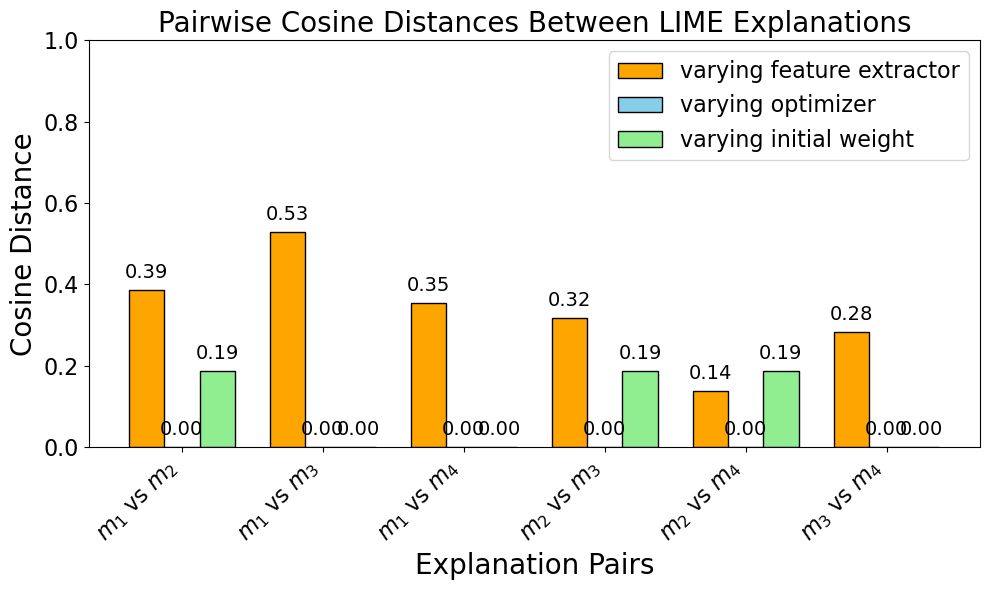

In [89]:
# Create the grouped bar plot
plt.figure(figsize=(10, 6))

# Bars for extrcs_distances
plt.bar(x - bar_width, extrcs_codis_lime, bar_width, color='orange', label='varying feature extractor', edgecolor='black')
# Bars for opts_distances
plt.bar(x, opts_codis_lime, bar_width, color='skyblue', label='varying optimizer', edgecolor='black')
# Bars for seeds_distances
plt.bar(x + bar_width, seeds_codis_lime, bar_width, color='lightgreen', label='varying initial weight', edgecolor='black')

# Add labels, title, and legend
plt.title("Pairwise Cosine Distances Between LIME Explanations", fontsize=20)
plt.xlabel("Explanation Pairs", fontsize=20)
plt.ylabel("Cosine Distance", fontsize=20)
plt.xticks(x, extrcs_copair_lime, rotation=45, ha="right", fontsize=16)  # Set x-ticks to pairs
plt.yticks(fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits
plt.legend(fontsize=16)

# Add data labels above each bar
for i, (extrc, opt, seed) in enumerate(zip(extrcs_codis_lime, opts_codis_lime, seeds_codis_lime)):
    plt.text(x[i] - bar_width, extrc + 0.02, f'{extrc:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i], opt + 0.02, f'{opt:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i] + bar_width, seed + 0.02, f'{seed:.2f}', ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

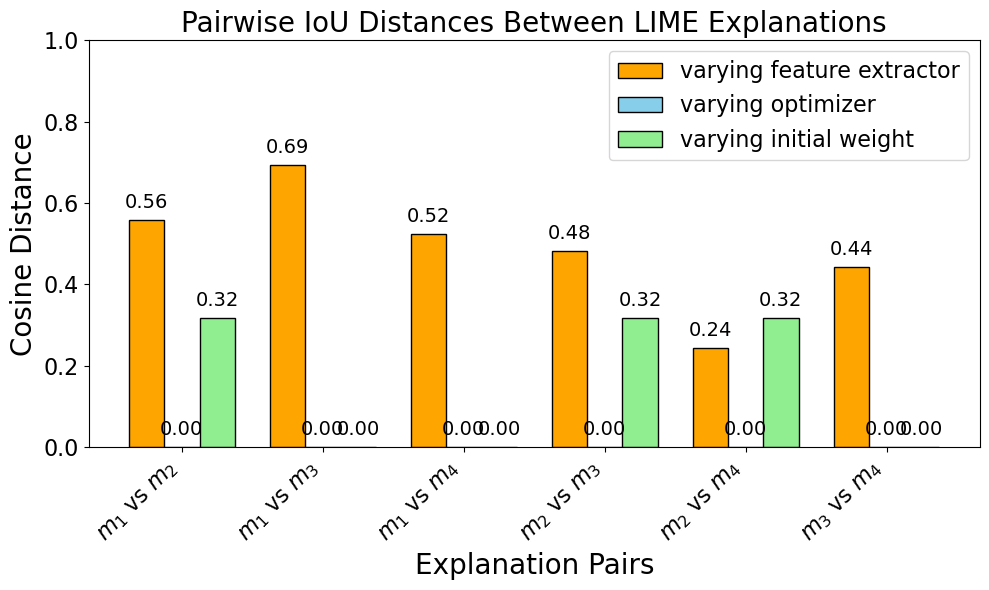

In [90]:
# Create the grouped bar plot
plt.figure(figsize=(10, 6))

# Bars for extrcs_distances
plt.bar(x - bar_width, extrcs_ioudis_lime, bar_width, color='orange', label='varying feature extractor', edgecolor='black')
# Bars for opts_distances
plt.bar(x, opts_ioudis_lime, bar_width, color='skyblue', label='varying optimizer', edgecolor='black')
# Bars for seeds_distances
plt.bar(x + bar_width, seeds_ioudis_lime, bar_width, color='lightgreen', label='varying initial weight', edgecolor='black')

# Add labels, title, and legend
plt.title("Pairwise IoU Distances Between LIME Explanations", fontsize=20)
plt.xlabel("Explanation Pairs", fontsize=20)
plt.ylabel("Cosine Distance", fontsize=20)
plt.xticks(x, extrcs_ioupair_lime, rotation=45, ha="right", fontsize=16)  # Set x-ticks to pairs
plt.yticks(fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits
plt.legend(fontsize=16)

# Add data labels above each bar
for i, (extrc, opt, seed) in enumerate(zip(extrcs_ioudis_lime, opts_ioudis_lime, seeds_ioudis_lime)):
    plt.text(x[i] - bar_width, extrc + 0.02, f'{extrc:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i], opt + 0.02, f'{opt:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i] + bar_width, seed + 0.02, f'{seed:.2f}', ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [62]:
import shap
from tools import SHAPExplainer

shap_explainer = SHAPExplainer()

In [63]:
start = time.time()

extrcs_shap = []
for model in extrc_models:
    expl = shap_explainer.explain_aninstance(test_img, model)
    extrcs_shap.append(expl)
end  = time.time()
print(f'Execution time: {end - start}s')

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.36s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:28, 28.65s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.26s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:29, 29.72s/it]                                                                    

Execution time: 120.57249641418457s


In [91]:
start = time.time()

opts_shap   = []
for model in opt_models:
    expl = shap_explainer.explain_aninstance(test_img, model)
    opts_shap.append(expl)
end  = time.time()
print(f'Execution time: {end - start}s')

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:32, 32.29s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.03s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.80s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.91s/it]                                                                    

Execution time: 125.23339200019836s


In [92]:
start = time.time()

seeds_shap  = []
for model in seed_models:
    expl = shap_explainer.explain_aninstance(test_img, model)
    seeds_shap.append(expl)

end   = time.time()
print(f'Execution time: {end - start}s')

  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.90s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.37s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.44s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.12s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.94s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.32s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:29, 29.71s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:31, 31.20s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.31s/it]                                                                    


  0%|          | 0/998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:30, 30.58s/it]                                                                    

Execution time: 309.39709520339966s


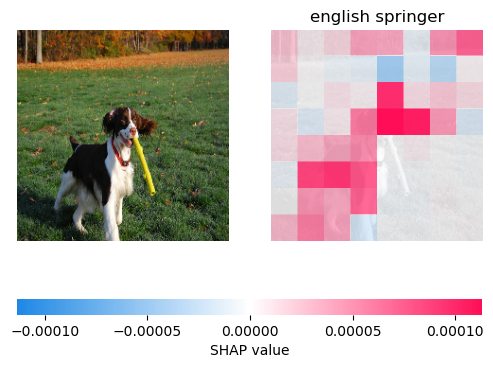

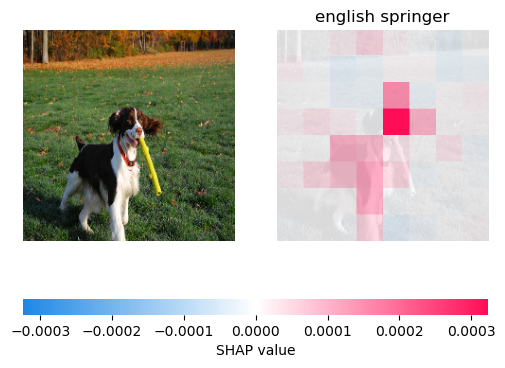

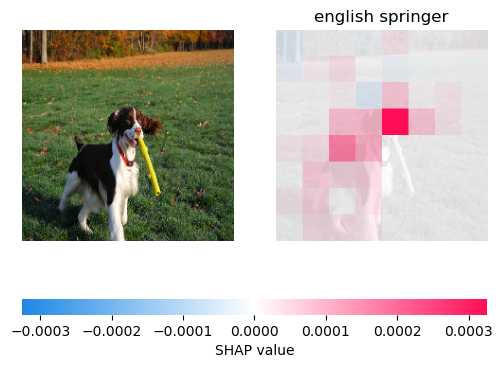

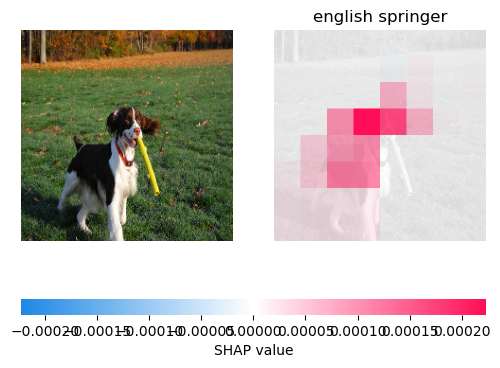

In [93]:
for explanation in extrcs_shap:
    shap.image_plot(explanation)

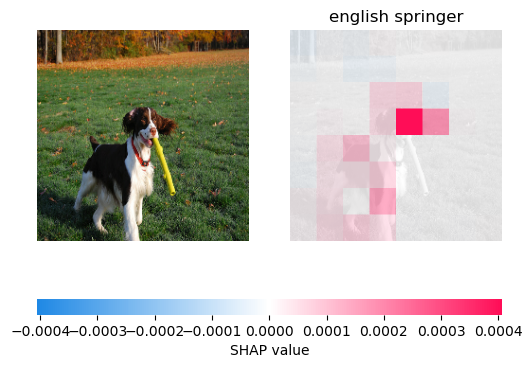

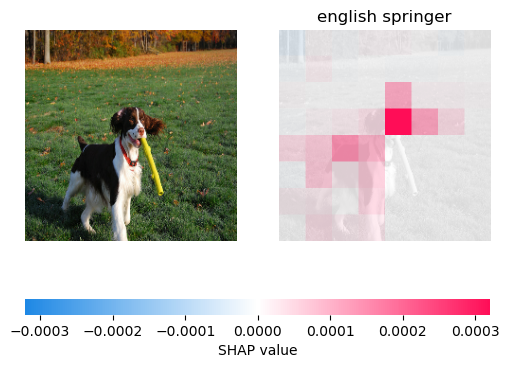

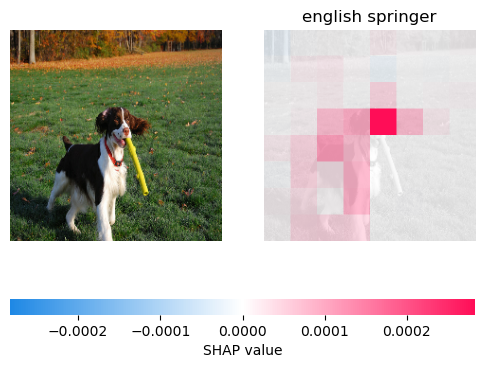

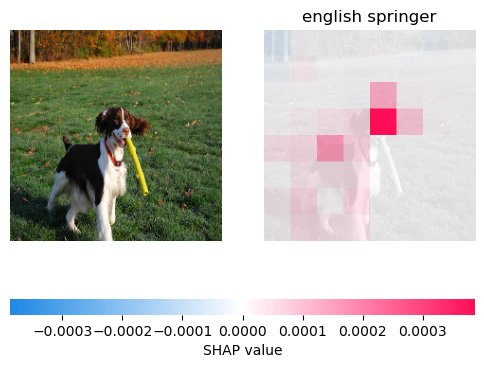

In [94]:
for explanation in opts_shap:
    shap.image_plot(explanation)

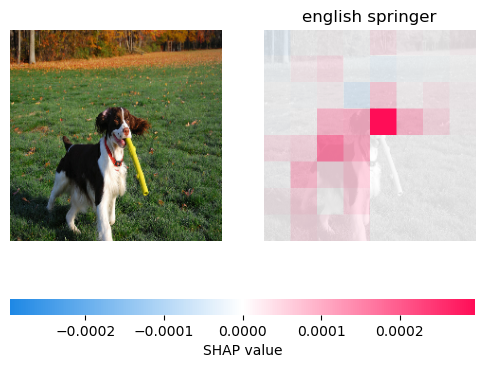

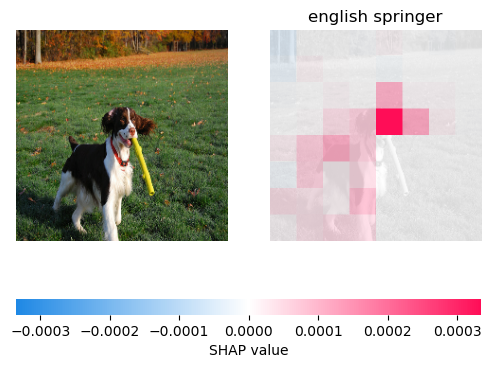

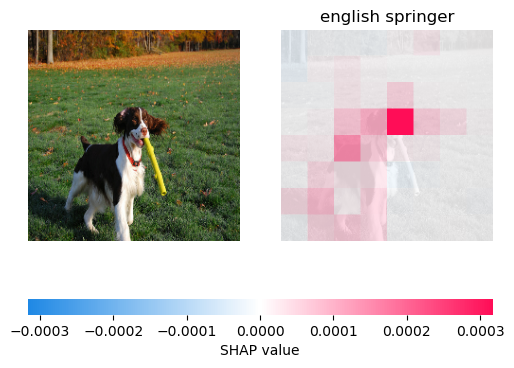

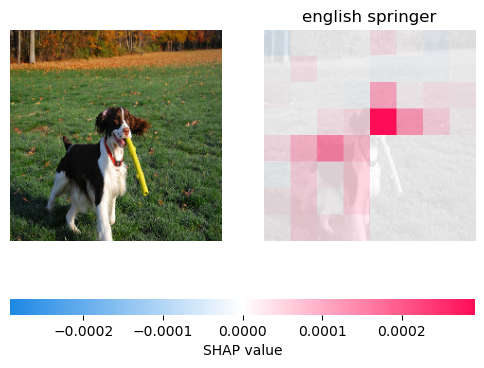

In [95]:
selected_expls   = [seeds_shap[i] for i in selected_indices]
selected_names   = [f'Seed{seed_name[i]}' for i in selected_indices]

for explanation in selected_expls:
    shap.image_plot(explanation)

In [121]:
def apply_threshold_and_binarize(shap_values, percentile=0.45):
    shap_values_squeezed      = shap_values.squeeze()
    shap_values_float         = shap_values_squeezed.astype('float32')
    binarized_values          = np.zeros_like(shap_values_float)

    for channel in range(shap_values_float.shape[2]):  # Iterate through RGB channels
        shap_values_channel   = shap_values_float[:, :, channel]
        positive_shap_values  = shap_values_channel[shap_values_channel > 0]

        if positive_shap_values.size > 0:
            max_score        = np.max(positive_shap_values)
            threshold        = percentile * max_score
        else:
            max_score        = 0
            threshold        = 0
            print(f'No positive SHAP values found in channel {channel}')

        binarized_values[:, :, channel] = np.where(shap_values_channel >= threshold, 1, 0).astype('float32')

    grayscale_image = np.mean(binarized_values, axis=2) 

    return grayscale_image

def cosine_distance_shap(expl1, expl2):
    mask1_values    = expl1[0].values
    mask2_values    = expl2[0].values

    mask1_binarized = apply_threshold_and_binarize(mask1_values)
    mask2_binarized = apply_threshold_and_binarize(mask2_values)
    
    mask1_flat      = mask1_binarized.flatten()
    mask2_flat      = mask2_binarized.flatten()

    dot_product     = np.dot(mask1_flat, mask2_flat)
    magnitude1      = np.linalg.norm(mask1_flat)
    magnitude2      = np.linalg.norm(mask2_flat)
    
    similarity      = dot_product / (magnitude1 * magnitude2)
    cosine_distance = 1 - similarity
    
    return cosine_distance

def iou_distance_shap(expl1, expl2):
    mask1_values    = expl1[0].values
    mask2_values    = expl2[0].values

    mask1_binarized = apply_threshold_and_binarize(mask1_values)
    mask2_binarized = apply_threshold_and_binarize(mask2_values)
    
    mask1_flat      = mask1_binarized.flatten()
    mask2_flat      = mask2_binarized.flatten()
    
    intersection = np.logical_and(mask1_flat, mask2_flat).sum()
    union        = np.logical_or(mask1_flat, mask2_flat).sum()

    if union == 0:
        return 1.0  # If union is zero, masks are completely disjoint

    iou          = intersection / union
    iou_distance = 1 - iou

    return iou_distance
    
def pairwise_codistance_shap(explanations, model_names):
    distances = []
    pairs = []
    for i in range(len(explanations)):
        for j in range(i + 1, len(explanations)):
            pair = f"${model_names[i]}$ vs ${model_names[j]}$"
            pairs.append(pair)
            dist = cosine_distance_shap(explanations[i], explanations[j])
            distances.append(dist)
    return distances, pairs

def pairwise_ioudistance_shap(explanations, model_names):
    distances = []
    pairs     = []
    for i in range(len(explanations)):
        for j in range(i + 1, len(explanations)):
            pair = f"${model_names[i]}$ vs ${model_names[j]}$"
            pairs.append(pair)
            dist = iou_distance_shap(explanations[i], explanations[j])
            distances.append(dist)
    return distances, pairs

In [122]:
# Generate pairwise distances and pairs for each explanation
extrcs_codis_shap, extrcs_copair_shap = pairwise_codistance_shap(extrcs_shap, names)
opts_codis_shap, opts_copair_shap     = pairwise_codistance_shap(opts_shap, names)
seeds_codis_shap, seeds_copair_shap   = pairwise_codistance_shap(selected_expls, selected_names)

In [123]:
extrcs_ioudis_shap, extrcs_ioupair_shap = pairwise_ioudistance_shap(extrcs_shap, names)
opts_ioudis_shap, opts_ioupair_shap     = pairwise_ioudistance_shap(opts_shap, names)
seeds_ioudis_shap, seeds_ioupair_shap   = pairwise_ioudistance_shap(selected_expls, selected_names)

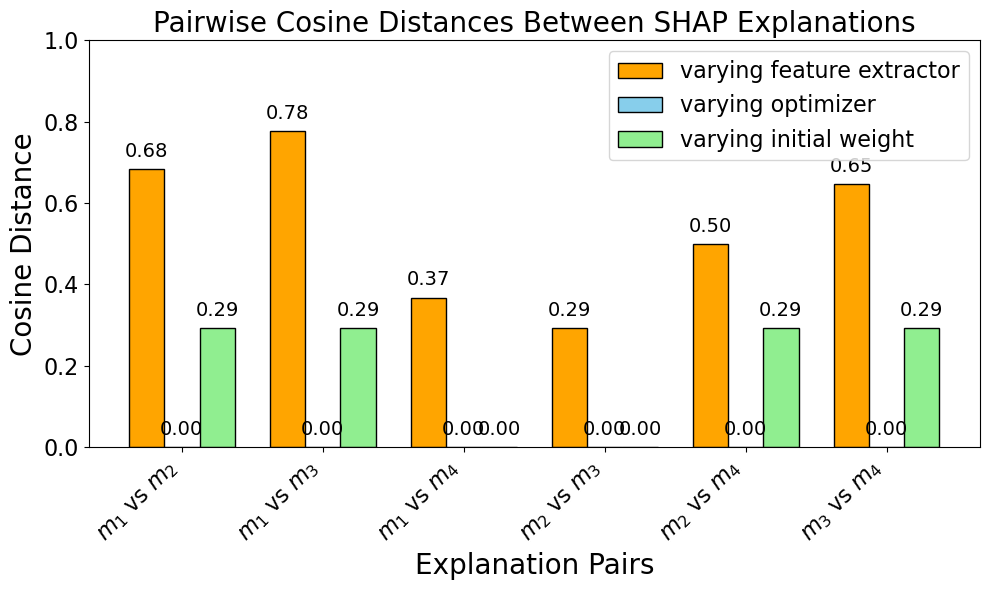

In [124]:
# Create the grouped bar plot
plt.figure(figsize=(10, 6))

# Bars for extrcs_distances
plt.bar(x - bar_width, extrcs_codis_shap, bar_width, color='orange', label='varying feature extractor', edgecolor='black')
# Bars for opts_distances
plt.bar(x, opts_codis_shap, bar_width, color='skyblue', label='varying optimizer', edgecolor='black')
# Bars for seeds_distances
plt.bar(x + bar_width, seeds_codis_shap, bar_width, color='lightgreen', label='varying initial weight', edgecolor='black')

# Add labels, title, and legend
plt.title("Pairwise Cosine Distances Between SHAP Explanations", fontsize=20)
plt.xlabel("Explanation Pairs", fontsize=20)
plt.ylabel("Cosine Distance", fontsize=20)
plt.xticks(x, extrcs_copair_shap, rotation=45, ha="right", fontsize=16)  # Set x-ticks to pairs
plt.yticks(fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits
plt.legend(fontsize=16)

# Add data labels above each bar
for i, (extrc, opt, seed) in enumerate(zip(extrcs_codis_shap, opts_codis_shap, seeds_codis_shap)):
    plt.text(x[i] - bar_width, extrc + 0.02, f'{extrc:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i], opt + 0.02, f'{opt:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i] + bar_width, seed + 0.02, f'{seed:.2f}', ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

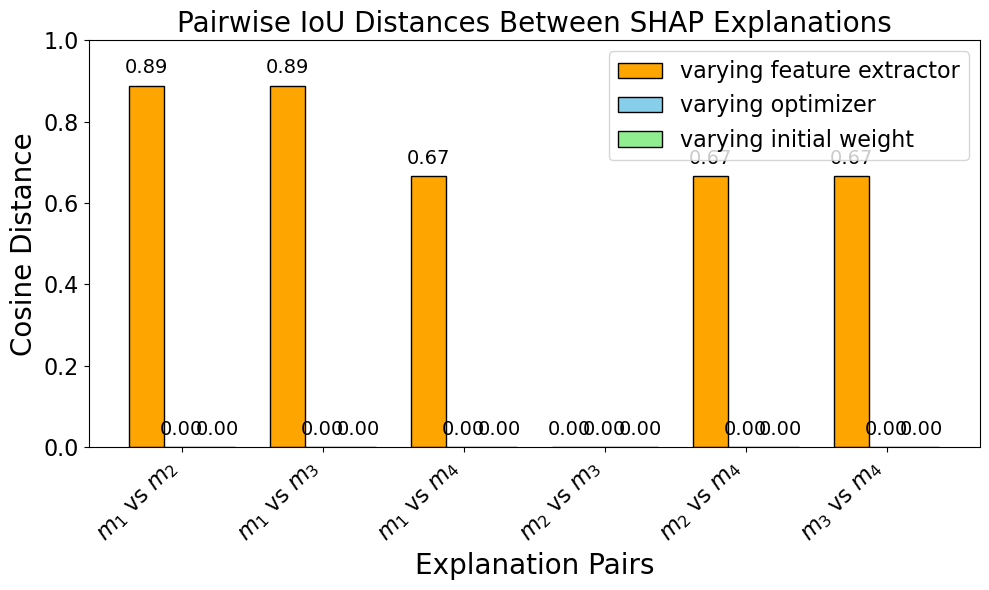

In [120]:
# Create the grouped bar plot
plt.figure(figsize=(10, 6))

# Bars for extrcs_distances
plt.bar(x - bar_width, extrcs_ioudis_shap, bar_width, color='orange', label='varying feature extractor', edgecolor='black')
# Bars for opts_distances
plt.bar(x, opts_ioudis_shap, bar_width, color='skyblue', label='varying optimizer', edgecolor='black')
# Bars for seeds_distances
plt.bar(x + bar_width, seeds_ioudis_shap, bar_width, color='lightgreen', label='varying initial weight', edgecolor='black')

# Add labels, title, and legend
plt.title("Pairwise IoU Distances Between SHAP Explanations", fontsize=20)
plt.xlabel("Explanation Pairs", fontsize=20)
plt.ylabel("Cosine Distance", fontsize=20)
plt.xticks(x, extrcs_ioupair_shap, rotation=45, ha="right", fontsize=16)  # Set x-ticks to pairs
plt.yticks(fontsize=16)
plt.ylim(0, 1)  # Set y-axis limits
plt.legend(fontsize=16)

# Add data labels above each bar
for i, (extrc, opt, seed) in enumerate(zip(extrcs_ioudis_shap, opts_ioudis_shap, seeds_ioudis_shap)):
    plt.text(x[i] - bar_width, extrc + 0.02, f'{extrc:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i], opt + 0.02, f'{opt:.2f}', ha='center', va='bottom', fontsize=14)
    plt.text(x[i] + bar_width, seed + 0.02, f'{seed:.2f}', ha='center', va='bottom', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()